___

<a href='https://sites.google.com/fat.uerj.br/livia'> <img src='../../figures/capa2.png' /></a>
___

In [1]:
path_data = '../../data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# percentis
Os dados numéricos podem ser classificados em ordem crescente ou decrescente. Assim, os valores de um conjunto de dados numéricos têm uma *ordem de classificação*. Um percentil é o valor em uma determinada classificação.

Por exemplo, se sua pontuação em um teste estiver no percentil 95, uma interpretação comum é que apenas 5% das pontuações foram maiores que a sua. A mediana é o percentil 50; é comumente assumido que 50% dos valores em um conjunto de dados estão acima da mediana.

Mas é necessário algum cuidado ao dar aos percentis uma definição precisa que funcione para todas as classificações e todas as listas. Para ver por que, considere um exemplo extremo em que todos os alunos de uma classe pontuam 75 em um teste. Então 75 é um candidato natural para a mediana, mas não é verdade que 50% das pontuações estão acima de 75. Além disso, 75 é um candidato igualmente natural para o percentil 95 ou 25 ou qualquer outro percentil. Laços – ou seja, valores de dados iguais – devem ser levados em consideração ao definir percentis.

Você também deve ter cuidado sobre exatamente até que ponto da lista ir quando o índice relevante não estiver claro. Por exemplo, qual deve ser o percentil 87 de uma coleção de 10 valores? O 8º valor da coleção classificada, ou o 9º, ou algo entre os dois?

Nesta seção, daremos uma definição que funciona consistentemente para todas as classificações e todas as listas.

## Um Exemplo Numérico
Antes de dar uma definição geral de todos os percentis, definiremos o 80º percentil de uma coleção de valores como sendo o menor valor na coleção que é pelo menos tão grande quanto 80% de todos os valores.

Por exemplo, vamos considerar os tamanhos dos cinco maiores continentes – África, Antártica, Ásia, América do Norte e América do Sul – arredondados para o milhão de milhas quadradas mais próximo.

In [2]:
sizes = np.array([12, 17, 6, 9, 7])

O percentil 80 é o menor valor que é pelo menos tão grande quanto 80% dos elementos de 'tamanhos', ou seja, quatro quintos dos cinco elementos. São 12:

In [3]:
np.sort(sizes)

array([ 6,  7,  9, 12, 17])

O 80º percentil é um valor na lista, ou seja, 12. Você pode ver que 80% dos valores são menores ou iguais a ele e que é o menor valor na lista para o qual isso é verdadeiro.

Analogamente, o percentil 70 é o menor valor na coleção que é pelo menos tão grande quanto 70% dos elementos de 'tamanhos'. Agora, 70% de 5 elementos são "3,5 elementos", então o 70º percentil é o 4º elemento da lista. Isso é 12, o mesmo que o percentil 80 para esses dados.

## A função `percentile`
A função `percentile` do pacote `numpy` recebe dois argumentos: uma classificação entre 0 e 100 e uma matriz. Ele retorna o percentil correspondente da matriz. Como na literatura existem diferentes definições para percentil, a gente tem que especificar para o `numpy` qual é a nossa definição. Neste caso, passamos o argumento `method='nearest'` para a função `percentile` para indicar que queremos o percentil definido como o menor valor na coleção que é pelo menos tão grande quanto o percentil.

In [4]:
np.percentile(sizes, 70, method='nearest')

12

### A Definição Geral ###

Seja $p$ um número entre 0 e 100. O $p$ésimo percentil de uma coleção é o menor valor na coleção que é pelo menos tão grande quanto p% de todos os valores.

Por essa definição, qualquer percentil entre 0 e 100 pode ser calculado para qualquer coleção de valores e é sempre um elemento da coleção.

Em termos práticos, suponha que existam $n$ elementos na coleção. Para encontrar o $p$ésimo percentil:
- Ordene a lista em ordem crescente.
- Encontre p% de n: $(p/100) \times n$. Chame isso de $k$.
- Se $k$ for um número inteiro, pegue o elemento $k$ th da lista ordenada.
- Se $k$ não for um inteiro, arredonde-o para o próximo inteiro e pegue esse elemento da lista ordenada.

### Example ###
The table `scores_and_sections` contains one row for each student in a class of 359 students. The columns are the student's discussion section and midterm score. 

In [5]:
scores_and_sections = pd.read_csv(path_data + 'scores_by_section.csv')
scores_and_sections

,Section,Midterm
0,1,22
1,2,12
2,2,23
3,2,14
4,1,20
...,...,...
354,5,24
355,2,16
356,2,17
357,12,16


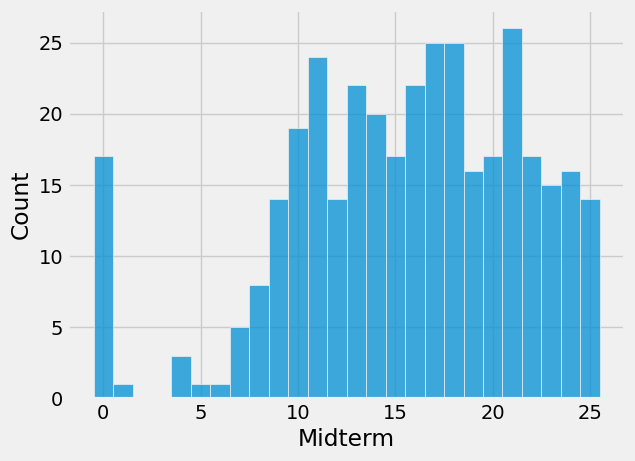

In [6]:
sns.histplot(scores_and_sections['Midterm'], bins=np.arange(-0.5, 25.6, 1));

Qual foi o percentil 85 das pontuações? Para usar a função `percentile`, crie uma matriz `scores` contendo as pontuações intermediárias e encontre o 85º percentil:

In [7]:
scores = scores_and_sections['Midterm']

In [8]:
np.percentile(scores, 85, method='nearest')

22

De acordo com a função de percentil, o 85º percentil era 22. Para verificar se isso é consistente com nossa nova definição, vamos aplicar a definição diretamente.

Primeiro, coloque as pontuações em ordem crescente:

In [9]:
sorted_scores = np.sort(scores_and_sections['Midterm'])

Existem 359 pontuações na matriz. Em seguida, encontre 85% de 359, que é 305,15.

In [10]:
0.85 * 359

305.15

Isso não é um número inteiro. Pela nossa definição, o 85º percentil é o 306º elemento de `sorted_scores`, que, pela convenção de indexação do Python, é o item 305 do array.

In [11]:
# The 306th element of the sorted array

sorted_scores[305]

22

É a mesma resposta que obtivemos usando `np.percentile`. No futuro, usaremos apenas `np.percentile`.

## Quartis
O *primeiro quartil* de uma coleção numérica é o percentil 25. A terminologia vem do *primeiro trimestre*. O segundo quartil é a mediana e o terceiro quartil é o percentil 75.

Para nossos dados de `scores`, esses valores são:

In [12]:
np.percentile(scores, 25, method='nearest')

11

In [13]:
np.percentile(scores, 50, method='nearest')

16

In [14]:
np.percentile(scores, 75, method='nearest')

20

As distribuições de pontuações às vezes são resumidas pelo intervalo "meio 50%", entre o primeiro e o terceiro quartil.